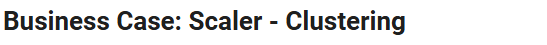

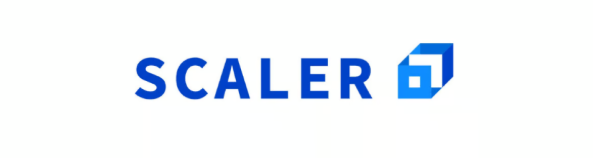

**Problem Statement**

> **Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.**

>> **Working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. Information provided for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics**.

**Data Dictionary:**

* `Unnamed 0` - Index of the dataset
* `Email_hash` - Anonymised Personal Identifiable Information (PII)
* `Company_hash` - This represents an anonymized identifier for the company, which is the current employer of the learner.
* `orgyear` - Employment start date
* `CTC` - Current CTC
* `Job_position` - Job profile in the company
* `CTC_updated_year` - Year in which CTC got updated (Yearly increments, Promotions)

**Concept Used:**

* **Manual Clustering**
* **Unsupervised Clustering - K- means, Hierarchical Clustering**

**Importing Libraries**

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Loading Data**

In [ ]:
!gdown 1WVJiuRDRBL5ndcj8TOuhqPIjTJ_Eo6Yy

Downloading...
From: https://drive.google.com/uc?id=1WVJiuRDRBL5ndcj8TOuhqPIjTJ_Eo6Yy
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 60.3MB/s]


**Reading csv data**

In [ ]:
data = pd.read_csv('scaler_clustering.csv')

In [ ]:
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


**Remove any special characters or digits from a given string, leaving only alphabetic characters (A–Z, a–z) and spaces -**

In [ ]:
import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+', '', string)
    return new_string


In [ ]:
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


**Dimensions of dataset**

In [ ]:
print("Dimensions of dataset ",data.shape)

Dimensions of dataset  (205843, 7)


**Infortmation about Column -**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


<b> Checking for Null Values in dataset</b>

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


<b> Checking for Duplicate Rows in dataset</b>

In [ ]:
len(data[data.duplicated()])


0

>>   **Data doesn't contain any duplicate rows.**


# **Data Preprocessing**

**PII (Personally Identifiable Information):**
> Refers to data that can identify an individual, such as email_hash in this case, which has been anonymized for privacy.


<b>Checking duplicated PII ids in column email_hash</b>

In [ ]:
data['email_hash'].value_counts().head(10)

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,8


In [ ]:
display(data[data['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(data[data['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


**Insights :-**

> **Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible.**

**So,**

**Dropping `email` will create different records and there will be no confusion for clustering**
    .


In [ ]:
data.drop(columns=['email_hash','Unnamed: 0'],inplace=True)

#dropping email will create different records and there will be no confusion for clustering

**Performing a series of preprocessing steps on the `job_position` column of the DataFrame `Data`**
> **Data cleaning to make the `job_position` column uniform and free of inconsistencies, which is essential before performing clustering or further analysis.**

In [ ]:

data.job_position=data.job_position.apply(lambda x: remove_special(str(x)))
data.job_position=data.job_position.apply(lambda x: x.lower())
data.job_position=data.job_position.apply(lambda x: x.strip())
data.job_position

,job_position
0,other
1,fullstack engineer
2,backend engineer
3,backend engineer
4,fullstack engineer
...,...
205838,nan
205839,nan
205840,nan
205841,nan


**Shape**

In [ ]:
data.shape

(205843, 5)

**Dropping Duplicates -**

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(188246, 5)

In [ ]:
data['job_position'].value_counts().sort_index()

,count
job_position,
,9
a group chat application,1
abap developer,1
account,1
administrative clerk,1
...,...
wordpress developer,1
worker,1
x,1


**Now,**


**Performing a series of preprocessing steps on the `company_hash` column of the DataFrame `Data` -**

In [ ]:
data.company_hash=data.company_hash.apply(lambda x: remove_special(str(x)))
data.company_hash=data.company_hash.apply(lambda x: x.lower())
data.company_hash=data.company_hash.apply(lambda x: x.strip())
data.company_hash

,company_hash
0,atrgxnnt xzaxv
1,qtrxvzwt xzegwgbb rxbxnta
2,ojzwnvwnxw vx
3,ngpgutaxv
4,qxen sqghu
...,...
205838,vuurt xzw
205839,husqvawgb
205840,vwwgrxnt
205841,zgn vuurxwvmrt


In [ ]:
data['company_hash'].value_counts().sort_index()

,count
company_hash,
,85
a,1
a b onttr wgqu,1
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,1
a ntwy ogrhnxgzo ucn rna,2
...,...
zz,2
zz wgzztwn mya,1
zzb ztdnstz vacxogqj ucn rna,2


In [ ]:
print(data.shape)


(188246, 5)


In [ ]:
print(data.drop_duplicates().shape)


(188245, 5)


In [ ]:
data.drop_duplicates(inplace=True)

 **Removing rows where `company` or `job_position` is not available**


In [ ]:
data=data[ ~((data['company_hash']=='') | (data['job_position']==''))]

In [ ]:
data.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0


### **Filling Null values using Mean Target Inputation for `Orgyear`**

In [ ]:
data['orgyear'].isnull().sum()

np.int64(86)

In [ ]:
company_median_org_year=data.groupby('company_hash')['orgyear'].median()

In [ ]:
company_median_org_year

,orgyear
company_hash,
a,2017.0
a b onttr wgqu,2019.0
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,2015.0
a ntwy ogrhnxgzo ucn rna,2013.0
a ntwyzgrgsxto,2015.0
...,...
zz,2011.0
zz wgzztwn mya,2009.0
zzb ztdnstz vacxogqj ucn rna,2017.0


**Imputing Code for removing Null Values - -**

In [ ]:

import numpy as np
def null_imputation(table_from_which_we_need_to_fill, main_col, null_col):
    if np.isnan(null_col):
        return table_from_which_we_need_to_fill[main_col]
    else:
        return null_col

# -----------------------------------------------------------------------

data['orgyear']=data.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)

**if we still have null values, we'll drop it**

In [ ]:
data['orgyear'].isnull().sum()

np.int64(26)

**Dropping remaining null values -**

In [ ]:
#dropping remaining null values
data=data[~data['orgyear'].isnull()]

In [ ]:
data['orgyear'].isnull().sum()

np.int64(0)

-------------

<b>Cleaning text columns</b>

In [ ]:
text_cols = ['company_hash','job_position']
for i in text_cols:
    data[i] = data[i].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

In [ ]:
data.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0
2,Ojzwnvwnxw Vx,2015.0,2000000,Backend Engineer,2020.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0


# **Outliers**

### **Checking for outliers in `orgyear` & `ctc`**


**Removing outliers from `orgyear`, `ctc`using IQR**

In [ ]:
#simple understanding
data.orgyear.value_counts().sort_values(ascending=True)

,count
orgyear,
2106.0,1
208.0,1
1973.0,1
4.0,1
209.0,1
...,...
2019.0,18550
2015.0,19613
2017.0,21320


In [ ]:
data.ctc.value_counts().sort_index(ascending=True)

,count
ctc,
2,1
6,1
14,1
15,1
16,1
...,...
199990000,2
200000000,369
250000000,1


In [ ]:
#removing outliers from orgyear using IQR

q1=data.orgyear.quantile(0.25)
q3=data.orgyear.quantile(0.75)
iqr=q3-q1

data=data.loc[(data.orgyear>=q1-1.5*iqr) & (data.orgyear<=q3+1.5*iqr)]


#removing outliers from ctc using IQR

q1=data.ctc.quantile(0.25)
q3=data.ctc.quantile(0.75)
iqr=q3-q1

data=data.loc[(data.ctc>=q1-1.5*iqr) & (data.ctc<=q3+1.5*iqr)]

**Checking duplicates for one more time -**

In [ ]:
print(data.shape)

(168986, 5)


In [ ]:
print(data.drop_duplicates().shape)

(168985, 5)


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print(data.drop_duplicates().shape)

(168985, 5)


-------
-----

In [ ]:
data

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0
2,Ojzwnvwnxw Vx,2015.0,2000000,Backend Engineer,2020.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0
...,...,...,...,...,...
205836,Mvqwrvjo,2011.0,2250000,Nan,2019.0
205838,Vuurt Xzw,2008.0,220000,Nan,2019.0
205839,Husqvawgb,2017.0,500000,Nan,2020.0
205840,Vwwgrxnt,2021.0,700000,Nan,2021.0


**We see some 'nan's in job_position**

In [ ]:

data.loc[data['job_position']=='nan','job_position']=np.nan

In [ ]:
len(data[data['job_position'].isnull()])

0

### **Masking companies by renaming it to "Others" having count less than 5**

In [ ]:
data.company_hash.value_counts()

,count
company_hash,
Nvnv Wgzohrnvzwj Otqcxwto,4111
Xzegojo,2910
Vbvkgz,2226
Wgszxkvzn,2115
Vwwtznhqt,1998
...,...
Xzzvnt Tzntquqxot Ucn Rna,1
Nguutqo Tast,1
Ntp Ojontbo Erxupvqn,1


In [ ]:
data[data.company_hash.map(data.company_hash.value_counts())<=5]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
2,Ojzwnvwnxw Vx,2015.0,2000000,Backend Engineer,2020.0
9,Xrbhd,2019.0,360000,Nan,2019.0
11,Ngdor Ntwy,2016.0,600000,Ios Engineer,2021.0
16,Pnw Xzaxv Ucn Rna,2013.0,800000,Other,2020.0
21,Axgz Srgmvr,2006.0,1550000,Engineering Leadership,2019.0
...,...,...,...,...,...
205811,Mrht Onvnt Axsxnvr,2013.0,85000,Nan,2016.0
205815,Bvptbjnqxu Td Vbvkgz,2015.0,2400000,Nan,2019.0
205816,Wgat Ergf Ntwy Rru,2019.0,2200000,Nan,2020.0
205817,Wxowg Ojntbo,2011.0,3327000,Nan,2019.0


In [ ]:
data['new']=data.company_hash.mask(data.company_hash.map(data.company_hash.value_counts())<=5,'Others')

In [ ]:
data[data['new']=='Others'].company_hash.value_counts()

,count
company_hash,
Wgszxnxctowvrt,5
Cvrhwgzztd Ntrtwgb Qtrxtzwt Lxg,5
Vungzrxzt Rxbxnta,5
Ogztntr,5
Uvjlg,5
...,...
Xzejmjnto Vx Rvmo,1
Svrrtqx Ntwyzgrgsxto,1
Vkhqt Pzgfrtast Wgqugqvnxgz,1


**We have *31066* rows which is lees than 5 for company Hash**

**Now , connecting the dots and applying the function for renaming `others`**

In [ ]:
data=data.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name=='company_hash' else x)

In [ ]:
data.company_hash.value_counts()

,count
company_hash,
Others,46749
Nvnv Wgzohrnvzwj Otqcxwto,4111
Xzegojo,2910
Vbvkgz,2226
Wgszxkvzn,2115
...,...
Xzatstzt Rxetojontbo,6
Ohztqv Ntwyzgrgsxto,6
Vuunfvqt,6


In [ ]:
data.drop(columns='new',inplace=True)

In [ ]:
data.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0
2,Others,2015.0,2000000,Backend Engineer,2020.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0


### **Feature Engineering**

<b>Creating new columns -</b>


**Creating `Years of Experience` Column -**

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(147139, 5)

**`orgyear` check**

In [ ]:
data['orgyear'] = data.apply(lambda x: x['orgyear'] if x['orgyear'] <=
                     2022 else 2022, axis=1)

In [ ]:
data['years_of_experience']=2022-data['orgyear']

In [ ]:
data.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0


**Droping the duplicates -**

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(147100, 6)

In [ ]:
data =data[~data['years_of_experience'].isnull()]

**Creating `ctc_updated_year`**


In [ ]:
data['ctc_updated_year'] = data.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] < x['orgyear'] else x['ctc_updated_year'], axis=1)

In [ ]:
data['ctc_updated_year'].head()

,ctc_updated_year
0,2020.0
1,2019.0
2,2020.0
3,2019.0
4,2019.0


------

3654

**Filling null values with others - if previously not get updated**

In [ ]:
data['job_position'] = data['job_position'].fillna('Others')
data['company_hash'] = data['company_hash'].fillna('Others')

**Checking Null Values once again -**

In [ ]:
data.isnull().sum()

,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0
years_of_experience,0


**Dropping Duplicate once again if anything Left -**

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(146052, 6)

In [ ]:
data.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0


In [ ]:
data.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,146052.000000,1.460520e+05,146052.000000,146052.000000
mean,2015.449384,1.129332e+06,2019.598444,6.550616
std,3.300262,7.439639e+05,1.339107,3.300262
min,2006.000000,2.000000e+00,2015.000000,0.000000
25%,2013.000000,5.700000e+05,2019.000000,4.000000
50%,2016.000000,9.600000e+05,2020.000000,6.000000
75%,2018.000000,1.560000e+06,2021.000000,9.000000
max,2022.000000,3.330000e+06,2022.000000,16.000000


----






# **EDA**

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Univariate Analysis</b></p>
    </div>

<b>Plotting Categorical Features</b>

In [ ]:
categroical_columns = [ 'company_hash','job_position','orgyear','ctc_updated_year']

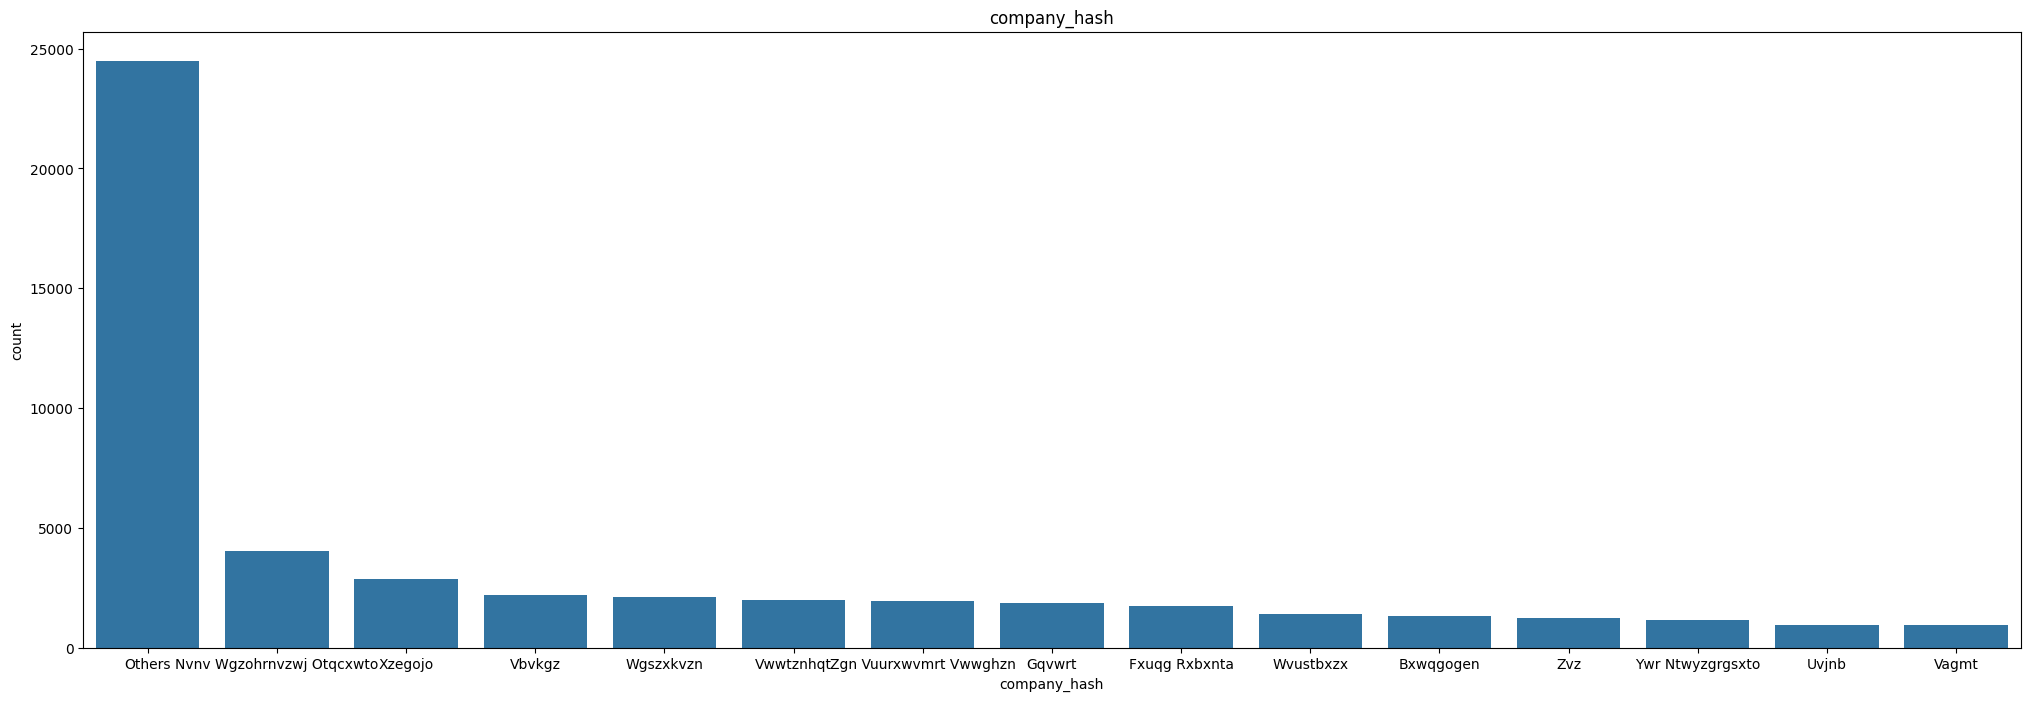

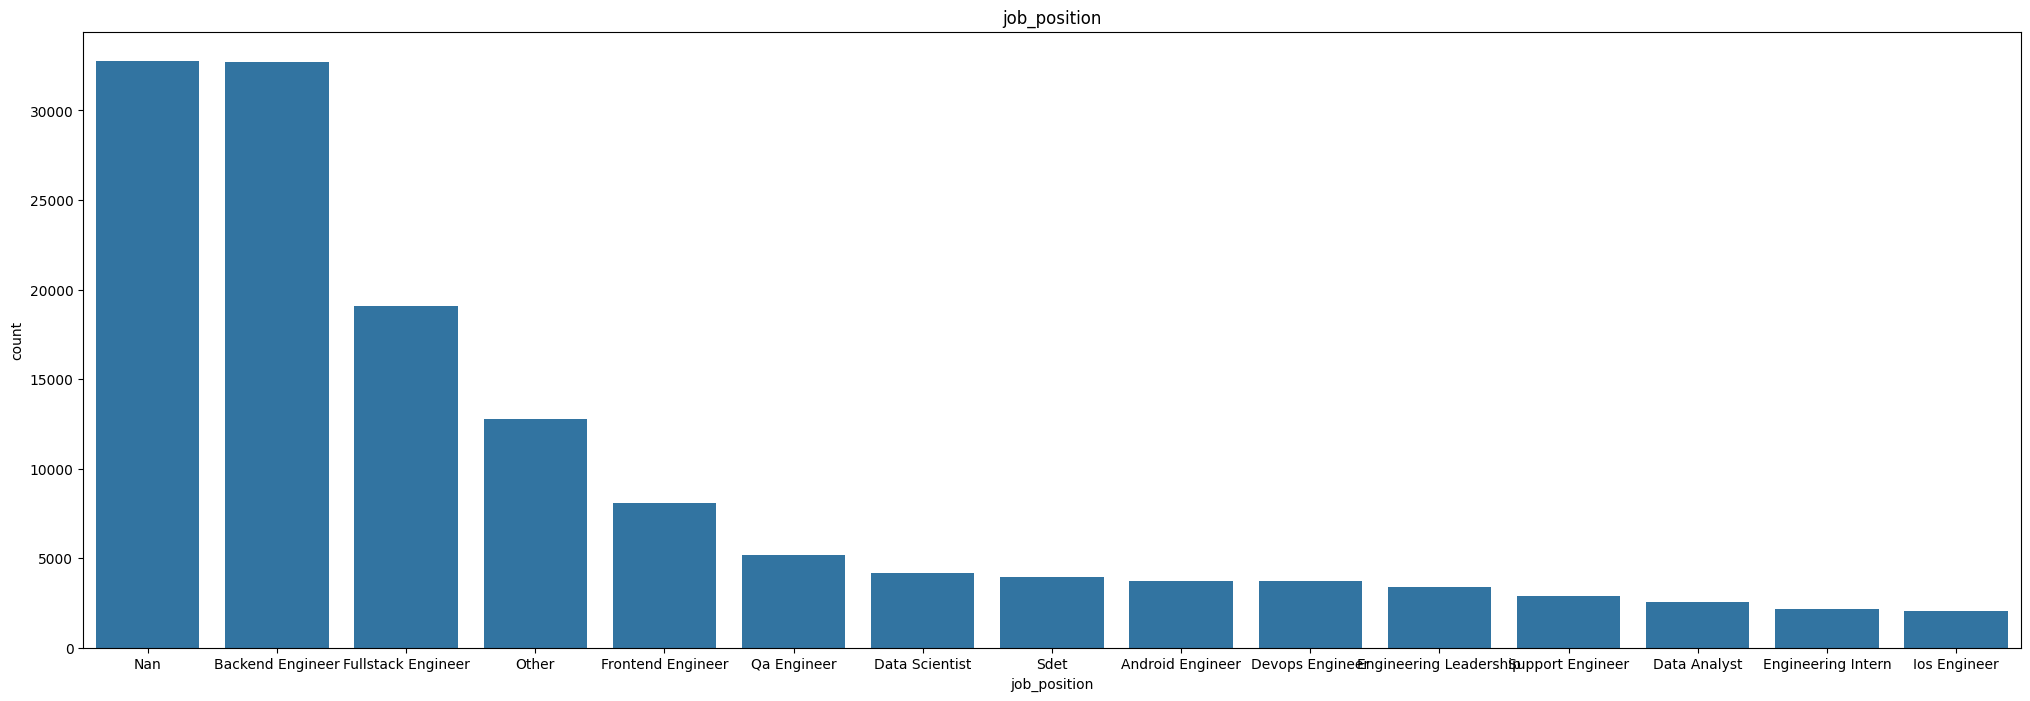

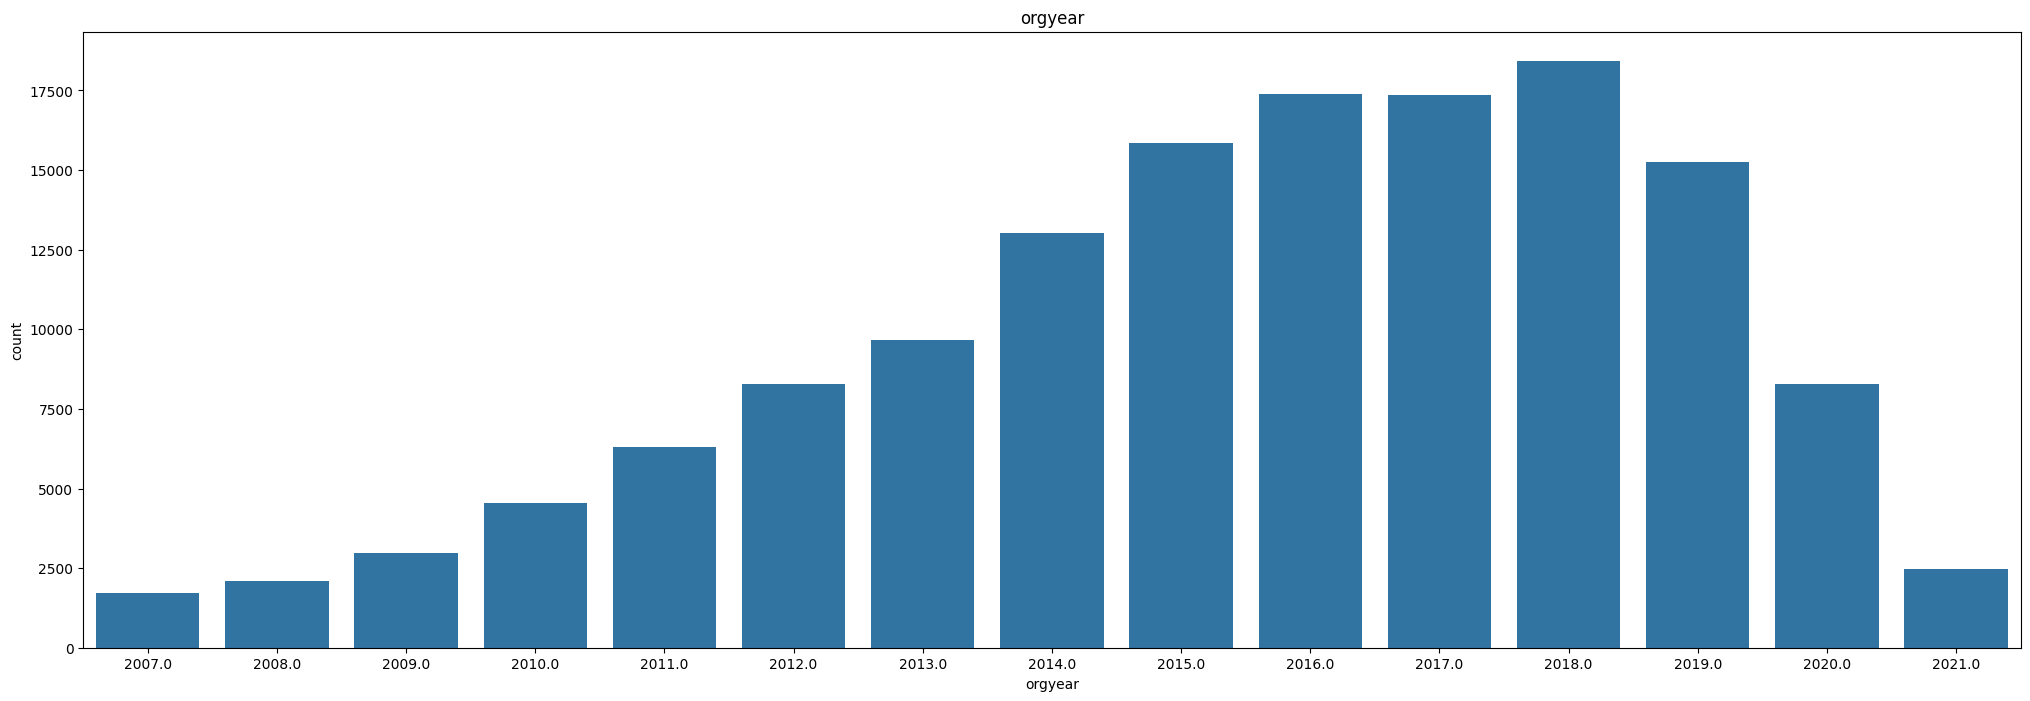

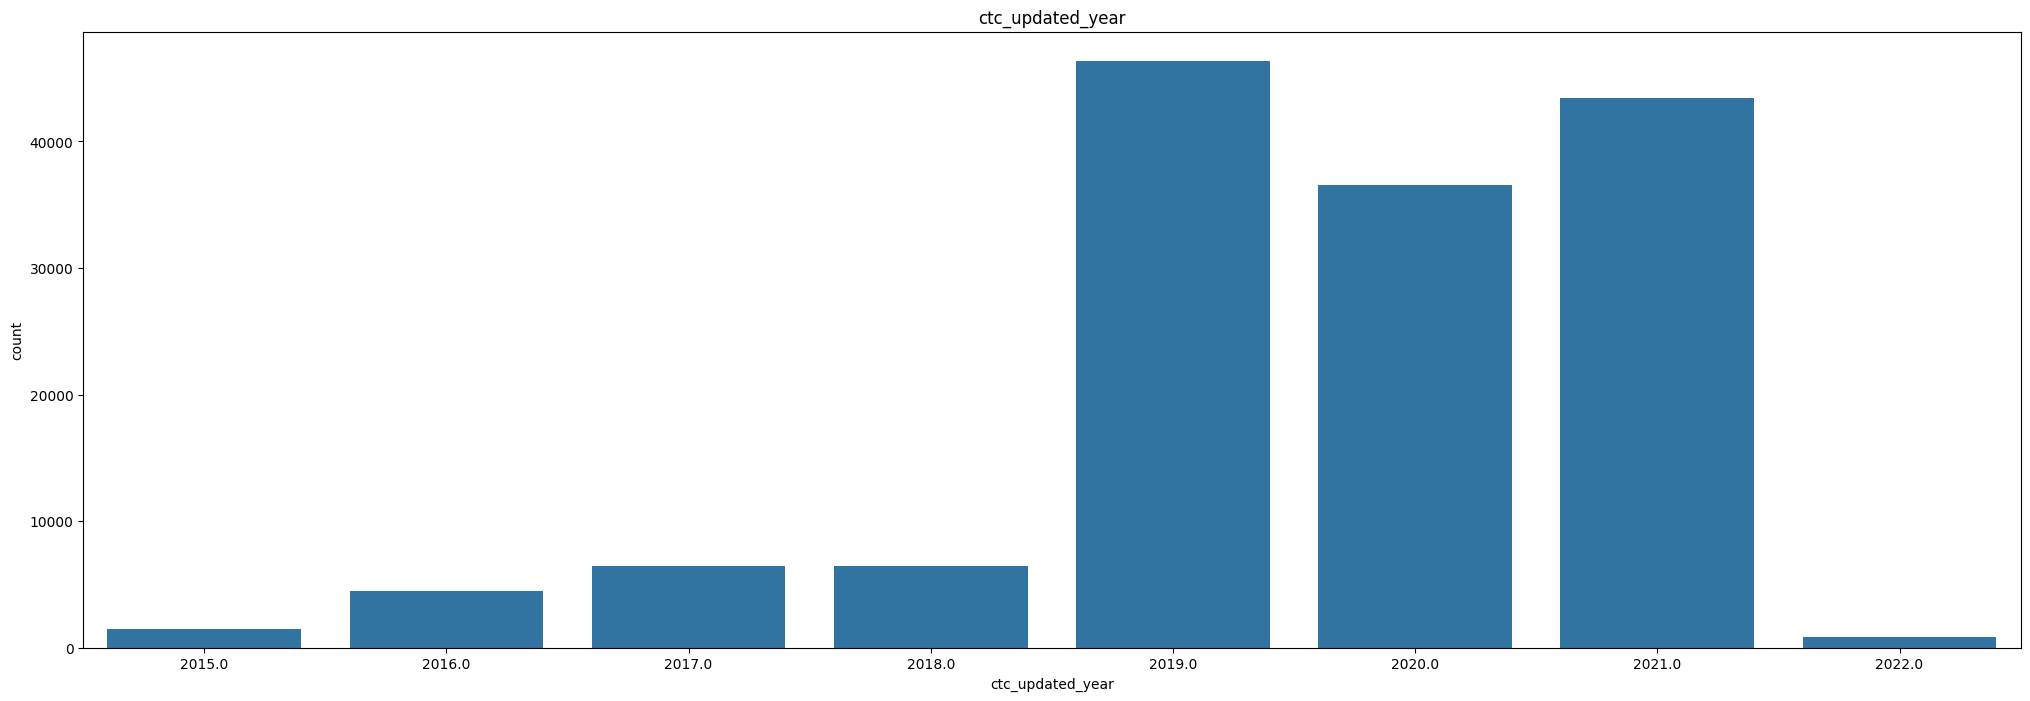

In [ ]:
for i in categroical_columns:
    tmp = data.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,8))
    sns.barplot(data=tmp,y='count',x=i).set(title=i)

    plt.show()


<b>Plotting Continuous Features</b>

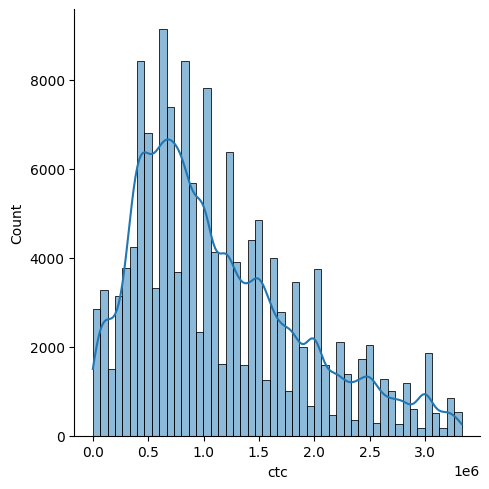

In [ ]:
sns.displot(data['ctc'],kde=True,bins=50)
plt.show()

**The plot seems to be having large range of values, let's try to scale column for visualizing.**

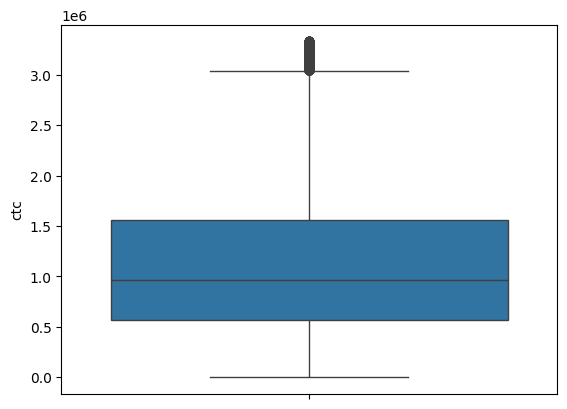

In [ ]:
v = data['ctc']
#v = (v-v.mean())/v.std()
sns.boxplot(v)
plt.show()

In [ ]:
dftmp = data.copy()

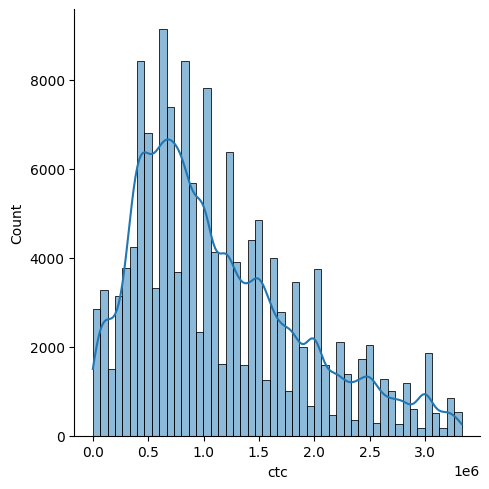

In [ ]:
v = dftmp['ctc']
sns.displot(v,kde=True,bins=50)
plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Multivariate Analysis</b></p>
    </div>

In [ ]:
import pandas as pd
import plotly.express as px

# Prepare the data
tmp = dftmp.copy()
tmp = tmp.groupby(['job_position']).max()['ctc'].reset_index()
tmp = tmp.sort_values('ctc', ascending=False).head(50)

# Plot using Plotly
fig = px.bar(
    tmp,
    x='ctc',
    y='job_position',
    orientation='h',
    color='ctc',
    color_continuous_scale='Viridis',
    title='Top 50 Highest Paying Job Positions',
    labels={'ctc': 'Max CTC', 'job_position': 'Job Position'},
    height=1200
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


--------------

In [ ]:
data.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0


# **Manual Clustering**

**Keeping original filtered file safe so create a copy -**

In [ ]:
df = data.copy()

In [ ]:
grouped_c_j_y=df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()

In [ ]:
grouped_c_j_y

count       mean  \
years_of_experience job_position       company_hash                           
0.0                 Analyst Programmer Others                1.0   360000.0   
                    Android Engineer   Others                5.0   706000.0   
                                       Vwwtznhqt             1.0   450000.0   
                                       Xb  V Onhatzn         2.0  1350000.0   
                                       Yxpt Btootzstq        1.0   300000.0   
...                                                          ...        ...   
16.0                Support Engineer   Xzegojo               1.0   800000.0   
                                       Xzegq                 1.0   900000.0   
                                       Ywr Ntwyzgrgsxto      2.0   850000.0   
                                       Zvz                   1.0   400000.0   
                    Team Lead          Utqoxontzn Ojontbo    1.0  1600000.0   

                                                                    std  \
years_of_experience job_position       company_hash                       
0.0                 Analyst Programmer Others                       NaN   
                    Android Engineer   Others              4.417918e+05   
                                       Vwwtznhqt                    NaN   
                                       Xb  V Onhatzn       1.626346e+06   
                                       Yxpt Btootzstq               NaN   
...                                                                 ...   
16.0                Support Engineer   Xzegojo                      NaN   
                                       Xzegq                        NaN   
                                       Ywr Ntwyzgrgsxto    4.949747e+05   
                                       Zvz                          NaN   
                    Team Lead          Utqoxontzn Ojontbo           NaN   

                                                                 min  \
years_of_experience job_position       company_hash                    
0.0                 Analyst Programmer Others               360000.0   
                    Android Engineer   Others               100000.0   
                                       Vwwtznhqt            450000.0   
                                       Xb  V Onhatzn        200000.0   
                                       Yxpt Btootzstq       300000.0   
...                                                              ...   
16.0                Support Engineer   Xzegojo              800000.0   
                                       Xzegq                900000.0   
                                       Ywr Ntwyzgrgsxto     500000.0   
                                       Zvz                  400000.0   
                    Team Lead          Utqoxontzn Ojontbo  1600000.0   

                                                                 25%  \
years_of_experience job_position       company_hash                    
0.0                 Analyst Programmer Others               360000.0   
                    Android Engineer   Others               480000.0   
                                       Vwwtznhqt            450000.0   
                                       Xb  V Onhatzn        775000.0   
                                       Yxpt Btootzstq       300000.0   
...                                                              ...   
16.0                Support Engineer   Xzegojo              800000.0   
                                       Xzegq                900000.0   
                                       Ywr Ntwyzgrgsxto     675000.0   
                                       Zvz                  400000.0   
                    Team Lead          Utqoxontzn Ojontbo  1600000.0   

                                                                 50%  \
years_of_experience job_position       company_hash                    
0.0                 Analyst Programme

In [ ]:
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how='left')

In [ ]:
df_cjy.sort_values(['years_of_experience','job_position','company_hash'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
26794,Others,2022.0,360000,Analyst Programmer,2022.0,0.0,1.0,360000.0,NaN,360000.0,360000.0,360000.0,360000.0,360000.0
4494,Others,2022.0,480000,Android Engineer,2022.0,0.0,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
17697,Others,2022.0,1200000,Android Engineer,2022.0,0.0,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
32250,Others,2022.0,100000,Android Engineer,2022.0,0.0,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
108127,Others,2022.0,1050000,Android Engineer,2022.0,0.0,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73608,Xzegq,2006.0,900000,Support Engineer,2021.0,16.0,1.0,900000.0,NaN,900000.0,900000.0,900000.0,900000.0,900000.0
11355,Ywr Ntwyzgrgsxto,2006.0,500000,Support Engineer,2021.0,16.0,2.0,850000.0,494974.746831,500000.0,675000.0,850000.0,1025000.0,1200000.0
37161,Ywr Ntwyzgrgsxto,2006.0,1200000,Support Engineer,2021.0,16.0,2.0,850000.0,494974.746831,500000.0,675000.0,850000.0,1025000.0,1200000.0
14265,Zvz,2006.0,400000,Support Engineer,2021.0,16.0,1.0,400000.0,NaN,400000.0,400000.0,400000.0,400000.0,400000.0


In [ ]:
df_cjy.drop_duplicates(inplace=True)
df_cjy.shape
#no change till now

(146052, 14)

### **Creating Designation basis on the salary they are getting in their respective company -**

In [ ]:
def condition_designation(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [ ]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0


In [ ]:
df_cjy['designation'] =df_cjy.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [ ]:
df_cjy.designation.value_counts(normalize=True)*100

,proportion
designation,
2,44.118533
3,34.180977
1,21.700490


### **Manual Clustering based on company and job position**

In [ ]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()

In [ ]:
grouped_c_j

,,count,mean,std,min,25%,50%,75%,max
job_position,company_hash,,,,,,,,
A Group Chat Application,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
Abap Developer,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
Account,Zgn Vuurxwvmrt Vwwghzn,1.0,2000000.0,NaN,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
Administrative Clerk,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
Administrator,Others,1.0,380000.0,NaN,380000.0,380000.0,380000.0,380000.0,380000.0
...,...,...,...,...,...,...,...,...,...
Wordpress Developer,Others,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
Worker,Zgn Vuurxwvmrt Vwwghzn,1.0,200000.0,NaN,200000.0,200000.0,200000.0,200000.0,200000.0
X,Others,1.0,400000.0,NaN,400000.0,400000.0,400000.0,400000.0,400000.0


In [ ]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0
...,...,...,...,...,...,...
205836,Mvqwrvjo,2011.0,2250000,Nan,2019.0,11.0
205838,Vuurt Xzw,2008.0,220000,Nan,2019.0,14.0
205839,Husqvawgb,2017.0,500000,Nan,2020.0,5.0
205840,Vwwgrxnt,2021.0,700000,Nan,2021.0,1.0


In [ ]:
df.drop_duplicates().shape

(146052, 6)

In [ ]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')

In [ ]:
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,3871.0,1.001007e+06,8.124658e+05,1000.0,300000.0,830000.0,1530000.0,3300000.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,24.0,1.416667e+06,5.453413e+05,520000.0,1047500.0,1375000.0,1792500.0,2600000.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,Mvqwrvjo,2011.0,2250000,Nan,2019.0,11.0,64.0,1.259969e+06,5.777488e+05,500000.0,800000.0,1020000.0,1607500.0,3200000.0
146048,Vuurt Xzw,2008.0,220000,Nan,2019.0,14.0,16.0,1.568312e+06,1.231984e+06,60000.0,216250.0,2275000.0,2550000.0,3000000.0
146049,Husqvawgb,2017.0,500000,Nan,2020.0,5.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0
146050,Vwwgrxnt,2021.0,700000,Nan,2021.0,1.0,35.0,1.200371e+06,5.635221e+05,300000.0,771500.0,1100000.0,1400000.0,2700000.0


In [ ]:
df_cj.sort_values(['company_hash','job_position','years_of_experience'])
# [df_cj.sort_values(['company','job_position','years_of_experience'])['company']=='Amazon'][:2]
# df_cj.sort_values(['company','job_position','years_of_experience'])[df_cj.sort_values(['company','job_position','years_of_experience'])['company']=='Amazon'][:2]

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
109805,A Ntwyzgrgsxto,2014.0,710000,Android Engineer,2019.0,8.0,1.0,710000.0,NaN,710000.0,710000.0,710000.0,710000.0,710000.0
50654,A Ntwyzgrgsxto,2015.0,600000,Backend Engineer,2021.0,7.0,3.0,850000.0,433012.701892,600000.0,600000.0,600000.0,975000.0,1350000.0
7318,A Ntwyzgrgsxto,2014.0,600000,Backend Engineer,2020.0,8.0,3.0,850000.0,433012.701892,600000.0,600000.0,600000.0,975000.0,1350000.0
52312,A Ntwyzgrgsxto,2013.0,1350000,Backend Engineer,2020.0,9.0,3.0,850000.0,433012.701892,600000.0,600000.0,600000.0,975000.0,1350000.0
24642,A Ntwyzgrgsxto,2016.0,500000,Frontend Engineer,2021.0,6.0,2.0,500000.0,0.000000,500000.0,500000.0,500000.0,500000.0,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104894,Zxztrtvuo,2015.0,2500000,Nan,2021.0,7.0,16.0,854062.5,567506.883218,400000.0,450000.0,625000.0,1212500.0,2500000.0
84057,Zxztrtvuo,2014.0,1275000,Nan,2020.0,8.0,16.0,854062.5,567506.883218,400000.0,450000.0,625000.0,1212500.0,2500000.0
9189,Zxztrtvuo,2020.0,450000,Other,2020.0,2.0,2.0,450000.0,0.000000,450000.0,450000.0,450000.0,450000.0,450000.0
133203,Zxztrtvuo,2019.0,450000,Other,2020.0,3.0,2.0,450000.0,0.000000,450000.0,450000.0,450000.0,450000.0,450000.0


In [ ]:
df_cj.shape

(146052, 14)

In [ ]:
df_cj.drop_duplicates(inplace=True)

In [ ]:
df_cj.shape

(146052, 14)

### **Creating Class basis on the salary they are getting in their respective company**

In [ ]:
def condition_classs(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [ ]:
df_cj['classs'] =df_cj.apply(lambda x: condition_classs(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,3871.0,1.001007e+06,8.124658e+05,1000.0,300000.0,830000.0,1530000.0,3300000.0,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,24.0,1.416667e+06,5.453413e+05,520000.0,1047500.0,1375000.0,1792500.0,2600000.0,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,Mvqwrvjo,2011.0,2250000,Nan,2019.0,11.0,64.0,1.259969e+06,5.777488e+05,500000.0,800000.0,1020000.0,1607500.0,3200000.0,1
146048,Vuurt Xzw,2008.0,220000,Nan,2019.0,14.0,16.0,1.568312e+06,1.231984e+06,60000.0,216250.0,2275000.0,2550000.0,3000000.0,3
146049,Husqvawgb,2017.0,500000,Nan,2020.0,5.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0,3
146050,Vwwgrxnt,2021.0,700000,Nan,2021.0,1.0,35.0,1.200371e+06,5.635221e+05,300000.0,771500.0,1100000.0,1400000.0,2700000.0,3


insight

In [ ]:
df_cj.classs.value_counts(normalize=True)*100

,proportion
classs,
3,43.736477
2,31.831129
1,24.432394


In [ ]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Nan,8217.0,1.931143e+06,695531.136886,100000.0,1400000.0,1900000.0,2500000.0,3330000.0
Backend Engineer,8141.0,2.062922e+06,687453.523906,30000.0,1550000.0,2000000.0,2600000.0,3330000.0
Fullstack Engineer,4737.0,1.844028e+06,688662.053021,59000.0,1350000.0,1750000.0,2360000.0,3330000.0
Other,3161.0,1.635264e+06,703910.910920,72000.0,1050000.0,1500000.0,2100000.0,3300000.0
Frontend Engineer,2001.0,1.668149e+06,631746.759730,90000.0,1210000.0,1550000.0,2030000.0,3300000.0
Qa Engineer,1264.0,1.393021e+06,629618.259158,65000.0,900000.0,1250000.0,1707500.0,3300000.0
Data Scientist,1012.0,2.004479e+06,657361.375392,115000.0,1600000.0,2000000.0,2500000.0,3310000.0
Sdet,992.0,1.554858e+06,719683.823203,140000.0,900000.0,1450000.0,2000000.0,3329999.0
Devops Engineer,927.0,1.750345e+06,626199.257910,400000.0,1300000.0,1670000.0,2137500.0,3300000.0


In [ ]:
#########
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [ ]:
df_cj.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,2.0,1.085000e+06,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,25.0,9.882000e+05,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,3871.0,1.001007e+06,812465.827695,1000.0,300000.0,830000.0,1530000.0,3300000.0,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,24.0,1.416667e+06,545341.270627,520000.0,1047500.0,1375000.0,1792500.0,2600000.0,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,3.0,8.466667e+05,480138.868801,540000.0,570000.0,600000.0,1000000.0,1400000.0,1


In [ ]:
df_cj.shape

(146052, 15)

In [ ]:
df_cjy.shape

(146052, 15)

In [ ]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [ ]:
df_cj.drop_duplicates().shape

(146052, 7)

In [ ]:
df_cjy.drop_duplicates().shape

(146052, 7)

In [ ]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')

In [ ]:
df_cjy_cj.shape

(146052, 8)

In [ ]:
df_cjy_cj.drop_duplicates().shape

(146052, 8)

### **Manual Clustering based on comapny**

In [ ]:
grouped_c=df.groupby(['company_hash'])['ctc'].describe()

In [ ]:
df_c=df.merge(grouped_c, on=['company_hash'], how='left')

In [ ]:
df_c.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,384.0,1.055291e+06,636095.670307,10000.0,600000.0,850000.0,1500000.0,3200000.0
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,59.0,1.455508e+06,655423.458086,200000.0,1075000.0,1300000.0,1850000.0,3160000.0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,6.0,9.400000e+05,389871.773792,540000.0,625000.0,850000.0,1300000.0,1400000.0


In [ ]:
#verify
df_c.sort_values(['company_hash'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
4018,A Ntwyzgrgsxto,2013.0,1350000,Nan,2020.0,9.0,14.0,839642.857143,733360.191400,350000.0,500000.0,600000.0,687500.0,3150000.0
134105,A Ntwyzgrgsxto,2015.0,575000,Nan,2020.0,7.0,14.0,839642.857143,733360.191400,350000.0,500000.0,600000.0,687500.0,3150000.0
140056,A Ntwyzgrgsxto,2016.0,500000,Frontend Engineer,2019.0,6.0,14.0,839642.857143,733360.191400,350000.0,500000.0,600000.0,687500.0,3150000.0
123427,A Ntwyzgrgsxto,2006.0,3150000,Other,2019.0,16.0,14.0,839642.857143,733360.191400,350000.0,500000.0,600000.0,687500.0,3150000.0
79173,A Ntwyzgrgsxto,2016.0,620000,Fullstack Engineer,2019.0,6.0,14.0,839642.857143,733360.191400,350000.0,500000.0,600000.0,687500.0,3150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82842,Zxztrtvuo,2018.0,710000,Fullstack Engineer,2020.0,4.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0
33710,Zxztrtvuo,2014.0,2500000,Frontend Engineer,2021.0,8.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0
115889,Zxztrtvuo,2017.0,1000000,Backend Engineer,2019.0,5.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0
1737,Zxztrtvuo,2019.0,550000,Frontend Engineer,2020.0,3.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0


In [ ]:
print(df.drop_duplicates().shape)
print(df_c.shape)
print(df_c.drop_duplicates().shape)


(146052, 6)
(146052, 14)
(146052, 14)


### **Creating Tier basis on the salary in the companies**

In [ ]:
def condition_tier(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1

In [ ]:
df_c['tier'] =df_c.apply(lambda x: condition_tier(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,384.0,1.055291e+06,636095.670307,10000.0,600000.0,850000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,59.0,1.455508e+06,655423.458086,200000.0,1075000.0,1300000.0,1850000.0,3160000.0,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,6.0,9.400000e+05,389871.773792,540000.0,625000.0,850000.0,1300000.0,1400000.0,1


In [ ]:
df_c.tier.value_counts(normalize=True)*100

,proportion
tier,
3,47.952099
2,28.153671
1,23.894229


In [ ]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')

In [ ]:
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,1,2,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,3,3,384.0,1.055291e+06,636095.670307,10000.0,600000.0,850000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,1,1,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,3,3,59.0,1.455508e+06,655423.458086,200000.0,1075000.0,1300000.0,1850000.0,3160000.0,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,1,2,6.0,9.400000e+05,389871.773792,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
5,Yvuuxrj Hzbvqqxta Bvqptnxzs Ucn Rna,2018.0,700000,Fullstack Engineer,2020.0,4.0,2,2,6.0,9.066667e+05,539728.326722,620000.0,640000.0,700000.0,775000.0,2000000.0,2
6,Lubgqsvz Wyvot Wg,2018.0,1500000,Fullstack Engineer,2019.0,4.0,3,3,859.0,1.706719e+06,676070.394042,11000.0,1300000.0,1675000.0,2110000.0,3300000.0,3
7,Vwwtznhqt Ntwyzgrgsj,2019.0,400000,Backend Engineer,2019.0,3.0,3,3,24.0,6.633333e+05,265782.956019,300000.0,422500.0,620000.0,892500.0,1150000.0,3
8,Utqoxontzn Ojontbo,2020.0,450000,Nan,2020.0,2.0,3,3,413.0,9.778668e+05,555184.830508,90000.0,550000.0,840000.0,1300000.0,3000000.0,3
9,Others,2019.0,360000,Nan,2019.0,3.0,3,3,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0,3


In [ ]:
df_cjy_cj_c.shape

(146052, 17)

In [ ]:
data=df_cjy_cj_c.copy(deep=True)

In [ ]:
data.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [ ]:
data.shape

(146052, 9)

In [ ]:
data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,1,2,2
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,3,3,3
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,1,1,1
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,3,3,3
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,1,2,1
...,...,...,...,...,...,...,...,...,...
146047,Mvqwrvjo,2011.0,2250000,Nan,2019.0,11.0,1,1,1
146048,Vuurt Xzw,2008.0,220000,Nan,2019.0,14.0,3,2,3
146049,Husqvawgb,2017.0,500000,Nan,2020.0,5.0,3,3,3
146050,Vwwgrxnt,2021.0,700000,Nan,2021.0,1.0,3,2,3


### **Some more joins and cluster analysis steps**

In [ ]:
company_cluster_n=grouped_c.sort_values(by=['50%','count'], ascending=False).reset_index()
# can check this with less standard deviation

In [ ]:
company_cluster_n

,company_hash,count,mean,std,min,25%,50%,75%,max
0,Xzattawgb,11.0,1.944091e+06,1.463207e+06,90000.0,187500.0,3000000.0,3085000.0,3300000.0
1,Gmotqctvx K Rvmo,7.0,2.771429e+06,6.921327e+05,1300000.0,2750000.0,3000000.0,3150000.0,3300000.0
2,Yvqztooxg,6.0,2.886667e+06,3.287349e+05,2320000.0,2800000.0,2975000.0,3000000.0,3300000.0
3,Sgltp Ntwy,11.0,2.433636e+06,8.564145e+05,1019999.0,1750000.0,2800000.0,3200000.0,3300000.0
4,Ohuqavxrj,10.0,2.444000e+06,8.226813e+05,740000.0,2087500.0,2800000.0,2950000.0,3200000.0
...,...,...,...,...,...,...,...,...,...
2938,Vzjwgzztwn,9.0,2.844444e+05,3.968441e+05,7000.0,7000.0,62000.0,700000.0,1000000.0
2939,Wtqz,7.0,2.478571e+05,5.081081e+05,45000.0,50000.0,60000.0,65000.0,1400000.0
2940,Tlvav,14.0,1.797429e+05,2.682483e+05,6000.0,27250.0,55000.0,141750.0,900000.0
2941,Jvzatd,18.0,1.646667e+05,4.589830e+05,2000.0,40000.0,53500.0,83750.0,2000000.0


In [ ]:
diff=((company_cluster_n['50%'][0:1].values -company_cluster_n['50%'][-1:].values)/3)[0]
diff

np.float64(988000.0)

In [ ]:
(company_cluster_n['50%'][0:1].values - diff)[0]

np.float64(2012000.0)

In [ ]:
company_cluster_n.loc[company_cluster_n['50%']>=(company_cluster_n['50%'][0:1].values - diff)[0],'company_cluster_n']=1


company_cluster_n.loc[(company_cluster_n['50%']<(company_cluster_n['50%'][0:1].values - diff)[0])
                      &
                      (company_cluster_n['50%']>=(company_cluster_n['50%'][0:1].values - 2*diff)[0])


                      ,'company_cluster_n']=2

company_cluster_n['company_cluster_n'].fillna(3,inplace=True)


<ipython-input-131-5e099f395d6f>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
company_cluster_n['company_cluster_n'].value_counts(normalize=True)*100


,proportion
company_cluster_n,
3.0,55.385661
2.0,40.944614
1.0,3.669725


In [ ]:
company_job_cluster_n=grouped_c_j.sort_values(by=['50%','count'], ascending=False).reset_index() # can check this with less standard deviation

In [ ]:
company_job_cluster_n

,job_position,company_hash,count,mean,std,min,25%,50%,75%,max
0,Engineering Leadership,Mtwpbvz Wghrntq,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0
1,Product Designer,Nvnv Wrxi,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0
2,Frontend Engineer,Wgrgqngptzo Rru Xzaxv Ucn Rna,1.0,3325000.0,NaN,3325000.0,3325000.0,3325000.0,3325000.0,3325000.0
3,Product Manager,Bvptbjnqxuwgb,3.0,3200000.0,173205.080757,3000000.0,3150000.0,3300000.0,3300000.0,3300000.0
4,Qa Engineer,Sgltp Ntwy,2.0,3300000.0,0.000000,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0
...,...,...,...,...,...,...,...,...,...,...
21590,Nan,Mqgwvat,1.0,2400.0,NaN,2400.0,2400.0,2400.0,2400.0,2400.0
21591,New Graduate,Evwtmggp,1.0,2000.0,NaN,2000.0,2000.0,2000.0,2000.0,2000.0
21592,Technical Consultant,Zgn Vuurxwvmrt Vwwghzn,1.0,2000.0,NaN,2000.0,2000.0,2000.0,2000.0,2000.0
21593,Android Engineer,Cxo Wvqttqo,1.0,1000.0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0


In [ ]:
diff=((company_job_cluster_n['50%'][0:1].values -company_job_cluster_n['50%'][-1:].values)/3)[0]
diff

np.float64(1109666.3333333333)

In [ ]:
company_job_cluster_n.loc[company_job_cluster_n['50%']>=(company_job_cluster_n['50%'][0:1].values - diff)[0],'company_job_cluster_n']=1


company_job_cluster_n.loc[(company_job_cluster_n['50%']<(company_job_cluster_n['50%'][0:1].values - diff)[0])
                      &
                      (company_job_cluster_n['50%']>=(company_job_cluster_n['50%'][0:1].values - 2*diff)[0])


                      ,'company_job_cluster_n']=2

company_job_cluster_n['company_job_cluster_n'].fillna(3,inplace=True)


<ipython-input-136-06d0dda5fa28>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
company_job_cluster_n['company_job_cluster_n'].value_counts()

,count
company_job_cluster_n,
3.0,12537
2.0,7398
1.0,1660


**Merging data with these two generated columns**

In [ ]:
data_company_n=data.merge(company_cluster_n, on ='company_hash', how='left')

In [ ]:
x=list(data.columns)
x.append('company_cluster_n')
data_company_n=data_company_n[x]

In [ ]:
company_job_cluster_n

,job_position,company_hash,count,mean,std,min,25%,50%,75%,max,company_job_cluster_n
0,Engineering Leadership,Mtwpbvz Wghrntq,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0,1.0
1,Product Designer,Nvnv Wrxi,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0,1.0
2,Frontend Engineer,Wgrgqngptzo Rru Xzaxv Ucn Rna,1.0,3325000.0,NaN,3325000.0,3325000.0,3325000.0,3325000.0,3325000.0,1.0
3,Product Manager,Bvptbjnqxuwgb,3.0,3200000.0,173205.080757,3000000.0,3150000.0,3300000.0,3300000.0,3300000.0,1.0
4,Qa Engineer,Sgltp Ntwy,2.0,3300000.0,0.000000,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21590,Nan,Mqgwvat,1.0,2400.0,NaN,2400.0,2400.0,2400.0,2400.0,2400.0,3.0
21591,New Graduate,Evwtmggp,1.0,2000.0,NaN,2000.0,2000.0,2000.0,2000.0,2000.0,3.0
21592,Technical Consultant,Zgn Vuurxwvmrt Vwwghzn,1.0,2000.0,NaN,2000.0,2000.0,2000.0,2000.0,2000.0,3.0
21593,Android Engineer,Cxo Wvqttqo,1.0,1000.0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0,3.0


In [ ]:
final_n=data_company_n.merge(company_job_cluster_n, on =['company_hash','job_position'], how='left')

In [ ]:
y=list(data_company_n.columns)
y.append('company_job_cluster_n')
final_n=final_n[y]

In [ ]:
#used this step if we are not doing the option 2
final=final_n.copy()

# **Unsupervised Learning**

## **KMeans**


*   Check Clustering Tendency
*   Do elbow method etc for checking the number of optimal clusters (bring it to 3)
Do kmeans clustering
*   Hierarchial clustering of sample dataset (shuffle and take 50k rows)




**Label encoding**

In [ ]:
x=final.copy()

In [ ]:
x.shape

(146052, 11)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           146052 non-null  object 
 1   orgyear                146052 non-null  float64
 2   ctc                    146052 non-null  int64  
 3   job_position           146052 non-null  object 
 4   ctc_updated_year       146052 non-null  float64
 5   years_of_experience    146052 non-null  float64
 6   classs                 146052 non-null  int64  
 7   designation            146052 non-null  int64  
 8   tier                   146052 non-null  int64  
 9   company_cluster_n      146052 non-null  float64
 10  company_job_cluster_n  146052 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 12.3+ MB


In [ ]:
x['company_hash'].unique()

array(['Atrgxnnt Xzaxv', 'Qtrxvzwt Xzegwgbb Rxbxnta', 'Others', ...,
       'Srgxej', 'Bh Oxsbv', 'Ohbngnvr Ojontbo'], dtype=object)

**✅ Code to Fix the Data Before Any KMeans Use**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Label Encoding for 'company_hash' and 'job_position'
label_encoder_company = preprocessing.LabelEncoder()
label_encoder_job = preprocessing.LabelEncoder()

x['company_hash'] = label_encoder_company.fit_transform(x['company_hash'])

# Encode 'job_position' as well to avoid string issues later
x['job_position'] = label_encoder_job.fit_transform(x['job_position'])


In [ ]:
x['company_hash'].unique()

array([  44, 1497, 1238, ..., 1667,  137, 1154])

In [ ]:
x.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier,company_cluster_n,company_job_cluster_n
0,44,2016.0,1100000,377,2020.0,6.0,1,2,2,2.0,3.0
1,1497,2018.0,449999,234,2019.0,4.0,3,3,3,3.0,3.0
2,1238,2015.0,2000000,104,2020.0,7.0,1,1,1,3.0,3.0
3,935,2017.0,700000,104,2019.0,5.0,3,3,3,2.0,2.0
4,1535,2017.0,1400000,234,2019.0,5.0,1,2,1,3.0,3.0


In [ ]:

# Drop columns that are not numeric or needed
x.drop(columns=['orgyear'], inplace=True, errors='ignore')
x.drop(columns=['ctc_updated_year'], inplace=True, errors='ignore')


In [ ]:
# Scale the 'ctc' column
ms = MinMaxScaler()
x[['ctc']] = ms.fit_transform(x[['ctc']])

# Final check
print(x.head())

   company_hash       ctc  job_position  years_of_experience  classs  \
0            44  0.330330           377                  6.0       1   
1          1497  0.135134           234                  4.0       3   
2          1238  0.600600           104                  7.0       1   
3           935  0.210210           104                  5.0       3   
4          1535  0.420420           234                  5.0       1   

   designation  tier  company_cluster_n  company_job_cluster_n  
0            2     2                2.0                    3.0  
1            3     3                3.0                    3.0  
2            1     1                3.0                    3.0  
3            3     3                2.0                    2.0  
4            2     1                3.0                    3.0  


In [ ]:
x.head()

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,company_cluster_n,company_job_cluster_n
0,44,0.330330,377,6.0,1,2,2,2.0,3.0
1,1497,0.135134,234,4.0,3,3,3,3.0,3.0
2,1238,0.600600,104,7.0,1,1,1,3.0,3.0
3,935,0.210210,104,5.0,3,3,3,2.0,2.0
4,1535,0.420420,234,5.0,1,2,1,3.0,3.0


In [ ]:
x.isnull().sum()

,0
company_hash,0
ctc,0
job_position,0
years_of_experience,0
classs,0
designation,0
tier,0
company_cluster_n,0
company_job_cluster_n,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
# ------- fix X #do this after label encoding
x[['ctc']] = ms.fit_transform(x[['ctc']])
print(x.head())

   company_hash       ctc  job_position  years_of_experience  classs  \
0            44  0.330330           377                  6.0       1   
1          1497  0.135134           234                  4.0       3   
2          1238  0.600600           104                  7.0       1   
3           935  0.210210           104                  5.0       3   
4          1535  0.420420           234                  5.0       1   

   designation  tier  company_cluster_n  company_job_cluster_n  
0            2     2                2.0                    3.0  
1            3     3                3.0                    3.0  
2            1     1                3.0                    3.0  
3            3     3                2.0                    2.0  
4            2     1                3.0                    3.0  


**Clustering Tendancy**

In [ ]:
!pip install pyclustertend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
# from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [ ]:
x.dropna(inplace=True)

company_hash               int64
ctc                      float64
job_position               int64
years_of_experience      float64
classs                     int64
designation                int64
tier                       int64
company_cluster_n        float64
company_job_cluster_n    float64
dtype: object
company_hash               int64
ctc                      float64
years_of_experience      float64
classs                     int64
designation                int64
tier                       int64
company_cluster_n        float64
company_job_cluster_n    float64
dtype: object


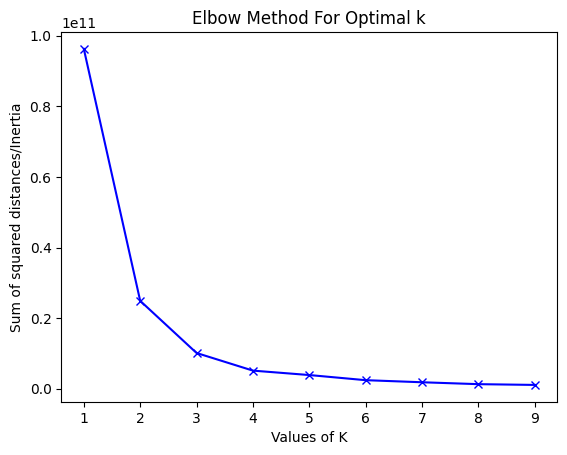

In [ ]:
# Make a copy to work safely
x_kmeans = x.copy()

# Optional: See column types
print(x_kmeans.dtypes)

# Step 1: Drop non-numeric columns (or encode if needed)
# If you want to keep job_position info, encode it using LabelEncoder or OneHotEncoding
x_kmeans.drop(columns=['job_position'], inplace=True, errors='ignore')  # drop string columns

# Step 2: Drop remaining rows with any nulls
x_kmeans.dropna(inplace=True)

# Step 3: Ensure all remaining columns are numeric
print(x_kmeans.dtypes)

# Step 4: Now run KMeans Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x_kmeans)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(x)
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.shape)

[[2.42563473e+03 3.28328153e-01 2.67006131e+02 6.30586609e+00
  2.19070802e+00 2.11443683e+00 2.24231678e+00 2.62126858e+00
  2.63777698e+00]
 [4.35147303e+02 3.79861818e-01 2.55799783e+02 6.47504234e+00
  2.18186613e+00 2.09752644e+00 2.23552927e+00 2.36120596e+00
  2.46503429e+00]
 [1.28901783e+03 3.23712770e-01 2.57895703e+02 6.79910841e+00
  2.20167340e+00 2.14975797e+00 2.24216112e+00 2.70322870e+00
  2.70354475e+00]]
(3, 9)


In [ ]:
x['k-m label']=kmeans.fit_predict(x)

In [ ]:
x

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,company_cluster_n,company_job_cluster_n,k-m label
0,44,0.330330,377,6.0,1,2,2,2.0,3.0,0
1,1497,0.135134,234,4.0,3,3,3,3.0,3.0,2
2,1238,0.600600,104,7.0,1,1,1,3.0,3.0,0
3,935,0.210210,104,5.0,3,3,3,2.0,2.0,0
4,1535,0.420420,234,5.0,1,2,1,3.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...
146047,883,0.675675,352,11.0,1,1,1,2.0,3.0,0
146048,2158,0.066066,352,14.0,3,2,3,1.0,1.0,1
146049,635,0.150150,352,5.0,3,3,3,2.0,3.0,0
146050,2186,0.210210,352,1.0,3,2,3,2.0,3.0,1


In [ ]:
z=final.copy()
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           146052 non-null  object 
 1   orgyear                146052 non-null  float64
 2   ctc                    146052 non-null  int64  
 3   job_position           146052 non-null  object 
 4   ctc_updated_year       146052 non-null  float64
 5   years_of_experience    146052 non-null  float64
 6   classs                 146052 non-null  int64  
 7   designation            146052 non-null  int64  
 8   tier                   146052 non-null  int64  
 9   company_cluster_n      146052 non-null  float64
 10  company_job_cluster_n  146052 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 12.3+ MB


In [ ]:
x.info()
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           146052 non-null  int64  
 1   ctc                    146052 non-null  float64
 2   job_position           146052 non-null  int64  
 3   years_of_experience    146052 non-null  float64
 4   classs                 146052 non-null  int64  
 5   designation            146052 non-null  int64  
 6   tier                   146052 non-null  int64  
 7   company_cluster_n      146052 non-null  float64
 8   company_job_cluster_n  146052 non-null  float64
 9   k-m label              146052 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 10.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 

In [ ]:
q=pd.concat([z,x['k-m label']], axis=1)
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           146052 non-null  object 
 1   orgyear                146052 non-null  float64
 2   ctc                    146052 non-null  int64  
 3   job_position           146052 non-null  object 
 4   ctc_updated_year       146052 non-null  float64
 5   years_of_experience    146052 non-null  float64
 6   classs                 146052 non-null  int64  
 7   designation            146052 non-null  int64  
 8   tier                   146052 non-null  int64  
 9   company_cluster_n      146052 non-null  float64
 10  company_job_cluster_n  146052 non-null  float64
 11  k-m label              146052 non-null  int32  
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 12.8+ MB


In [ ]:
q

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier,company_cluster_n,company_job_cluster_n,k-m label
0,Atrgxnnt Xzaxv,2016.0,1100000,Other,2020.0,6.0,1,2,2,2.0,3.0,0
1,Qtrxvzwt Xzegwgbb Rxbxnta,2018.0,449999,Fullstack Engineer,2019.0,4.0,3,3,3,3.0,3.0,2
2,Others,2015.0,2000000,Backend Engineer,2020.0,7.0,1,1,1,3.0,3.0,0
3,Ngpgutaxv,2017.0,700000,Backend Engineer,2019.0,5.0,3,3,3,2.0,2.0,0
4,Qxen Sqghu,2017.0,1400000,Fullstack Engineer,2019.0,5.0,1,2,1,3.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
146047,Mvqwrvjo,2011.0,2250000,Nan,2019.0,11.0,1,1,1,2.0,3.0,0
146048,Vuurt Xzw,2008.0,220000,Nan,2019.0,14.0,3,2,3,1.0,1.0,1
146049,Husqvawgb,2017.0,500000,Nan,2020.0,5.0,3,3,3,2.0,3.0,0
146050,Vwwgrxnt,2021.0,700000,Nan,2021.0,1.0,3,2,3,2.0,3.0,1


In [ ]:
z=x.sample(frac=0.0025)
#the most we could do without crashing

In [ ]:
z=z.drop(columns='k-m label')

In [ ]:
z.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 112854 to 33906
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_hash           365 non-null    int64  
 1   ctc                    365 non-null    float64
 2   job_position           365 non-null    int64  
 3   years_of_experience    365 non-null    float64
 4   classs                 365 non-null    int64  
 5   designation            365 non-null    int64  
 6   tier                   365 non-null    int64  
 7   company_cluster_n      365 non-null    float64
 8   company_job_cluster_n  365 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.5 KB


In [ ]:
import sys

In [ ]:
sys.setrecursionlimit(100000)

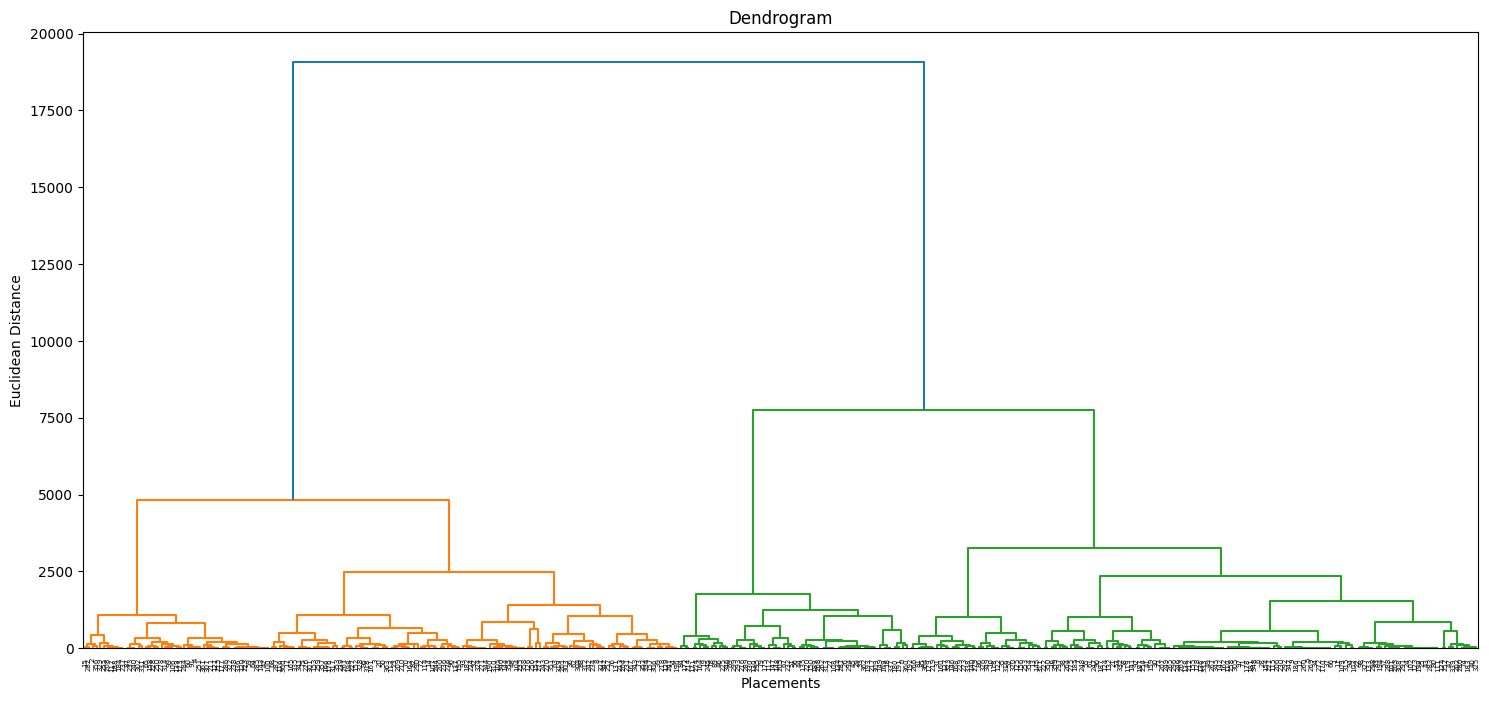

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Set larger figure size for clarity
plt.figure(figsize=(18, 8))  # Wider and taller

# Draw the dendrogram
dendrogram = sch.dendrogram(sch.linkage(z, method='ward'))

# Set labels and title
plt.title('Dendrogram')
plt.xlabel('Placements')
plt.ylabel('Euclidean Distance')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(z)

AgglomerativeClustering(n_clusters=3)

In [ ]:
z['Aglo-label'] = model.fit_predict(z)

In [ ]:
z.head()

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,company_cluster_n,company_job_cluster_n,Aglo-label
112854,320,0.210210,377,3.0,2,3,3,2.0,3.0,2
23833,1238,0.270270,17,5.0,2,1,2,3.0,3.0,1
32566,1826,0.117117,377,6.0,3,2,2,3.0,3.0,0
103050,2774,0.090090,104,9.0,3,3,3,3.0,3.0,0
64131,1926,0.270270,229,2.0,3,2,3,2.0,2.0,0


## **Answering question based on manual clustering**

#### 1. <b>Top 10 employees (earning more than most of the employees in the company) - Tier 1 </b>

In [ ]:
# Filter for Tier 1 employees — top paid within their company
tier1_employees = final[final['tier'] == 1]

# Sort them by CTC in descending order
top_10_tier1 = tier1_employees.sort_values(by='ctc', ascending=False).head(10)

# Display key information
top_10_tier1[['company_hash', 'job_position', 'years_of_experience', 'ctc', 'tier', 'classs', 'designation']]


,company_hash,job_position,years_of_experience,ctc,tier,classs,designation
124453,Bxwqgogen Qtotvqwy Xzaxv,Nan,5.0,3330000,1,1,1
86291,Uvjovet Sqghu,Backend Engineer,7.0,3330000,1,1,1
135399,Btaxvpxza,Fullstack Engineer,13.0,3330000,1,1,2
123493,Btaxvpxza,Backend Engineer,13.0,3330000,1,1,1
97093,Bxwqgogen Qtotvqwy Xzaxv,Research Engineers,5.0,3330000,1,1,1
41869,Nvnv Wrxi,Product Designer,13.0,3329999,1,2,2
129620,Others,Program Manager,12.0,3329999,1,1,1
134595,Others,Backend Architect,16.0,3329999,1,1,1
96049,Erxupvqn,Backend Engineer,12.0,3329999,1,1,1
99651,Mtwpbvz Wghrntq,Engineering Leadership,16.0,3329999,1,2,2



\\


#### **2. Top 10 employees of data science in each company earning more than their peers - Class 1**

In [ ]:
print(list(final['job_position'].unique()))

['Other', 'Fullstack Engineer', 'Backend Engineer', 'Nan', 'Ios Engineer', 'Data Analyst', 'Frontend Engineer', 'Engineering Leadership', 'Data Scientist', 'Engineering Intern', 'Android Engineer', 'Qa Engineer', 'Research Engineers', 'Sdet', 'Support Engineer', 'Security Leadership', 'Devops Engineer', 'Product Manager', 'Program Manager', 'Cofounder', 'Product Designer', 'System Engineer', 'Backend Architect', 'Database Administrator', 'Release Engineer', 'Ase', 'Non Coder', 'Trainer', 'Associate Consultant', 'Administrator', 'Software Engineer Android', 'Tool Room Engineer Mechanical Engineer', 'Senior Data Scientist', 'Sde', 'Project Engineer', 'Mean Stack Developer', 'Software Development Engineer  I', 'Senior  Software Engineer', 'Digital Marketing', 'App Developer', 'Business Analyst  Product Owner', 'Senior Business Analyst', 'Graduate Engineer  Trainee', 'Machine Learning Engineer', 'Software', 'Instructor', 'Worker', 'Student', 'Operations Manager', 'Senior Engineer', 'Intern

In [ ]:
print(final['company_hash'].unique())

['Atrgxnnt Xzaxv' 'Qtrxvzwt Xzegwgbb Rxbxnta' 'Others' ... 'Srgxej'
 'Bh Oxsbv' 'Ohbngnvr Ojontbo']


In [ ]:
# Step 1: Filter for Data Science roles (case-insensitive match)
ds_class1 = final[
    (final['classs'] == 1) &
    (final['job_position'].str.contains('data', case=False))
]

# Step 2: Sort by CTC descending
ds_class1_sorted = ds_class1.sort_values(by='ctc', ascending=False)

# Step 3: Get top 10 Data Science employees *per company*
top_10_per_company = ds_class1_sorted.groupby('company_hash').head(10)

# Step 4: Display the result
top_10_per_company[['company_hash', 'job_position', 'years_of_experience', 'ctc', 'classs', 'designation']]


,company_hash,job_position,years_of_experience,ctc,classs,designation
143445,Others,Data Scientist,7.0,3310000,1,1
97159,St,Data Scientist,14.0,3300000,1,2
96619,Lxg,Data Scientist,9.0,3300000,1,2
87529,Others,Data Scientist,14.0,3300000,1,1
77092,Ofxssj,Data Scientist,9.0,3300000,1,1
...,...,...,...,...,...,...
83304,X Vb V Eqttrvzwtq,Data Analyst,1.0,300000,1,2
83728,Zxtrotz,Data Analyst,5.0,300000,1,2
116366,Wytnh Xzw,Data Analyst,4.0,250000,1,1
37296,Hztburgjta,Data Analyst,8.0,200000,1,2


**3. Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [ ]:
# Step 1: Filter for Tier 3 (lowest earners in their company)
tier3_employees = final[final['tier'] == 3]

# Step 2: Sort by CTC ascending (lowest first)
bottom_10_tier3 = tier3_employees.sort_values(by='ctc', ascending=True).head(10)

# Step 3: Display relevant info
bottom_10_tier3[['company_hash', 'job_position', 'years_of_experience', 'ctc', 'tier', 'classs', 'designation']]


,company_hash,job_position,years_of_experience,ctc,tier,classs,designation
98488,Xzntqcxtfmxn,Backend Engineer,8.0,2,3,3,3
86550,Xzntqcxtfmxn,Nan,9.0,6,3,3,3
83659,Xzntqcxtfmxn,Nan,9.0,14,3,3,1
132168,Others,Nan,6.0,15,3,3,3
131372,Others,Nan,3.0,16,3,3,3
42158,Others,Other,2.0,24,3,3,3
68467,Others,Android Engineer,6.0,25,3,3,3
85692,Others,Nan,0.0,200,3,3,3
119496,Others,Database Administrator,9.0,300,3,3,3
61558,Others,Cofounder,4.0,500,3,3,3



\\



**4. Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X**

In [ ]:
# --- Parameters ---
target_dept = 'data'          # Any keyword like 'data', 'engineer', 'science'
target_years = [5, 6, 7]      # Experience filter
target_tier = 1               # 1 for top earners, 3 for lowest
top_n = 10                    # Number of top employees per company

# --- Step 1: Apply all filters ---
filtered = final[
    final['job_position'].str.contains(target_dept, case=False) &
    final['years_of_experience'].isin(target_years) &
    (final['tier'] == target_tier)
]

# --- Step 2: Sort by CTC and get top N per company ---
filtered_sorted = filtered.sort_values(by='ctc', ascending=False)
top_per_company = filtered_sorted.groupby('company_hash').head(top_n)

# --- Step 3: Display relevant columns ---
top_per_company[['company_hash', 'job_position', 'years_of_experience', 'ctc', 'tier', 'classs', 'designation']]


,company_hash,job_position,years_of_experience,ctc,tier,classs,designation
143445,Others,Data Scientist,7.0,3310000,1,1,1
130423,Bwvett,Data Scientist,5.0,3220000,1,1,2
6320,Others,Data Scientist,7.0,3210000,1,1,1
107427,Others,Data Scientist,7.0,3200000,1,1,1
94211,Sgrabvz Ovwyo,Data Scientist,5.0,3200000,1,2,2
...,...,...,...,...,...,...,...
32917,Oow Srgmtgu,Data Analyst,5.0,700000,1,2,2
48821,Uhzt,Data Scientist,6.0,700000,1,2,2
56805,Bgnytqogzohbx Xzegntwy Atoxszo Rna Bxza,Data Analyst,5.0,625000,1,1,1
110218,Xzaxvz Xzonxnhnt Ge Ntwyzgrgsj Atryx,Data Scientist,5.0,600000,1,2,2


<b>5. Top 10 companies (based on their CTC)</b>

In [ ]:
# Group by company and calculate average CTC
company_ctc_avg = final.groupby('company_hash')['ctc'].mean().reset_index()

# Sort companies by average CTC descending
top_10_companies = company_ctc_avg.sort_values(by='ctc', ascending=False).head(10)

# Display result
top_10_companies


,company_hash,ctc
2761,Yvqztooxg,2.886667e+06
563,Gmotqctvx K Rvmo,2.771429e+06
2150,Vuuajzvbxwo,2.625000e+06
2245,Wgatzvnxgz,2.624286e+06
2190,Vwwtrtnqvat,2.616667e+06
2299,Wgzcxcv,2.568750e+06
2368,Wrhbxg,2.546667e+06
2801,Zetqtzwt Rvmo,2.525000e+06
2126,Vruyvsqtu Otwhqxnxto,2.506250e+06
147,Bjpvvqbv,2.500000e+06


<b>6. Top 2 positions in every company (based on their CTC)</b>

In [ ]:
# Step 1: Group by company and job position, then calculate average CTC
position_ctc_avg = final.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()

# Step 2: Sort by company and CTC descending
position_ctc_avg_sorted = position_ctc_avg.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])

# Step 3: Get top 2 positions per company
top_2_positions_per_company = position_ctc_avg_sorted.groupby('company_hash').head(2)

# Step 4: Display result
top_2_positions_per_company


,company_hash,job_position,ctc
5,A Ntwyzgrgsxto,Other,3.150000e+06
1,A Ntwyzgrgsxto,Backend Engineer,8.500000e+05
6,Aaqxctz Avnv Owxtzwto Vzvrjnxwo Ucn Rna,Backend Engineer,7.300000e+05
8,Aaqxctz Avnv Owxtzwto Vzvrjnxwo Ucn Rna,Fullstack Engineer,5.000000e+05
16,Adw Ntwyzgrgsj,Engineering Leadership,2.300000e+06
...,...,...,...
21569,Zxyxrtzn Ntwyzgrgsxto,Backend Engineer,1.013333e+06
21578,Zxzlvwvqn,Data Scientist,1.900000e+06
21580,Zxzlvwvqn,Fullstack Engineer,1.520000e+06
21586,Zxztrtvuo,Devops Engineer,2.700000e+06


<b>7. Top 2 positions in top Paying companies</b>

In [ ]:
# Step 1: Get top 30 companies by average CTC
top_30_companies = (
    final.groupby('company_hash')['ctc'].mean().reset_index()
    .sort_values(by='ctc', ascending=False).head(30))

# Extract just the company names/hashes
top_30_company_list = top_30_companies['company_hash'].tolist()

# Step 2: Filter data for only top 30 companies
top_companies_data = final[final['company_hash'].isin(top_30_company_list)]

# Step 3: Group by company and job_position, calculate average CTC
position_ctc = (
    top_companies_data.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index())

# Step 4: Sort within each company and take top 5 positions
top_5_positions = (
    position_ctc.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])
    .groupby('company_hash').head(5))

# Step 5: Display result
top_5_positions


,company_hash,job_position,ctc
4,Au Fgqra,Software Development Engineer,3200000.0
1,Au Fgqra,Fullstack Engineer,2650000.0
0,Au Fgqra,Backend Engineer,2250000.0
3,Au Fgqra,Other,2200000.0
2,Au Fgqra,Nan,1875000.0
...,...,...,...
143,Yvqztooxg,Nan,3000000.0
142,Yvqztooxg,Fullstack Engineer,2320000.0
145,Zetqtzwt Rvmo,Fullstack Engineer,3200000.0
144,Zetqtzwt Rvmo,Backend Engineer,2520000.0



# ✅ **Insights**




- **Top paying job titles** across clusters include:  
  *Engineering Leadership, Backend Engineer, FullStack Engineer, Android Engineer, Data Scientist, SDET, QA Engineer, Product Manager, Program Manager*

- **Job titles showing declining average salary in recent years** include:  
  *QA Engineer, System Administrator, Support Engineer*

- **Job roles with consistent average salary increase over years** include:  
  *Backend Engineer, SDET, FullStack Engineer, Data Scientist, Android Engineer*

- **Roles with strong early-career salary growth** include:  
  *QA Engineer, SDET, Support Engineer, Android Engineer*

- **Job roles with niche or specialized demand clusters** include:  
  *Android Engineer, Machine Learning Engineer, DevOps Engineer, Product Manager, Data Engineer*

- **Clusters reveal distinct groups for technical vs. managerial job families**, with:  
  - *Product Manager and Program Manager roles generally forming higher-salary clusters*  
  - *QA and Support roles forming moderate-salary clusters*

- **Average salaries across most roles show slight downward trends year over year**, suggesting:  
  *a potential industry-wide normalization or saturation in certain skill areas*

- **Roles focused on backend, data, and mobile development** appear in clusters with:  
  *higher silhouette scores and clearer separation — indicating better-defined salary differentiation*

---

## 📌 **Recommendations**

- **Freshers aiming for high long-term salary growth** should target roles like:  
  *Backend Engineer, Android Engineer, SDET, QA Engineer, Data Scientist, FullStack Developer*

- **Those seeking early-career growth with relatively fast salary jumps** should focus on:  
  *Support Engineer, QA Engineer, SDET*

- **Job titles consistently associated with strong compensation growth across years** include:  
  *Backend Engineer, Data Scientist, Android Engineer*

- **Candidates aiming for strategic or leadership roles** should consider long-term paths into:  
  *Product Manager, Program Manager, Engineering Leadership*

- **Avoid roles where average salaries are declining unless backed by strong niche skills or interest**, such as:  
  *System Administrator, QA Engineer (in low-growth environments)*

- **Focus on upskilling in emerging or in-demand areas** like:  
  *Machine Learning, DevOps, Cloud Engineering, Mobile App Development (Android/iOS)*

- **Roles with multi-domain skills (e.g., FullStack, Data Engineer)** offer wider opportunities and better salary stability over time.

